In [1]:
import pandas as pd
import numpy as np

from metrics import evaluate_model
import statsmodels.formula.api as smf

In [2]:
merge_matches_and_players = pd.read_csv('data/merged_datasets/merged_players_and_matches.csv')
merge_matches_and_players


/var/folders/1g/73xq_y097vb49f6ck4py9d6c0000gp/T/ipykernel_76901/2968269630.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  merge_matches_and_players = pd.read_csv('data/merged_datasets/merged_players_and_matches.csv')


,home_team,away_team,home_score,away_score,match_datetime,referee,referee_id,goals,home_starter_id_fl_1,home_starter_id_fl_2,...,away_starter_id_fl_2_fifa_version,away_starter_id_fl_3_fifa_version,away_starter_id_fl_4_fifa_version,away_starter_id_fl_5_fifa_version,away_starter_id_fl_6_fifa_version,away_starter_id_fl_7_fifa_version,away_starter_id_fl_8_fifa_version,away_starter_id_fl_9_fifa_version,away_starter_id_fl_10_fifa_version,away_starter_id_fl_11_fifa_version
0,Paris Saint-Germain FC,Red Star Belgrade,6.0,1.0,2018-10-03 18:55:00,Soares Dias,368,"[{'time': ""74'"", 'team': 'Red Star Belgrade', ...",51211.0,62078.0,...,74243_19,38477_19,85311_19,50048_19,29300_19,94567_19,7284_19,77692_19,74247_19,21072_19
1,Gil Vicente,Rio Ave,2.0,2.0,2022-09-17 15:30:00,João Gonçalves,6675,"[{'time': ""45'"", 'team': 'Rio Ave', 'scorer': ...",130738.0,143472.0,...,74421_22,61188_22,108009_22,128883_22,90554_22,100246_22,117400_22,121686_22,136941_22,92827_22
2,Sevilla,Real Betis,2.0,1.0,2022-02-27 16:15:00,del Cerro,1940,"[{'time': ""94'"", 'team': 'Real Betis', 'scorer...",72680.0,945.0,...,71533_22,45279_22,43471_22,75819_22,94936_22,57985_22,27930_22,82010_22,55099_22,97771_22
3,Benfica,Atletico Madrid,4.0,0.0,2024-10-02 20:00:00,Gözübüyük,1267,[],131363.0,120844.0,...,9435_24,79085_24,130371_24,96652_24,71566_24,40555_24,140401_24,78663_24,132331_24,44311_24
4,OGC Nice,SC Bastia,1.0,1.0,2016-11-27 17:00:00,Jaffredo,18,"[{'time': ""60'"", 'team': 'SC Bastia', 'scorer'...",85513.0,68232.0,...,76029_-1,41419_-1,1326_-1,23261_-1,22360_-1,27608_-1,2814_-1,6533_-1,86701_-1,57510_-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33174,FC Porto,Nacional,3.0,0.0,2025-05-17 18:00:00,José Bessa,7738,[],105568.0,178532.0,...,26643_24,109177_24,184850_24,175188_24,163678_24,96058_24,211400_24,62968_24,121475_24,94403_24
33175,Celtic FC,Dundee FC,3.0,2.0,2022-02-20 15:00:00,Duncan,3621,"[{'time': ""26'"", 'team': 'Dundee FC', 'scorer'...",3184.0,108835.0,...,127716_22,151884_22,82655_22,100491_22,91440_22,171977_22,66873_22,137140_22,82197_22,127208_22
33176,Atletico Madrid,Villarreal,3.0,1.0,2020-02-23 21:00:00,De Burgos Bengoetxea,2755,"[{'time': ""15'"", 'team': 'Villarreal', 'scorer...",53415.0,51045.0,...,74198_20,860_20,105949_20,69609_20,66539_20,15489_20,66287_20,1642_20,70446_20,55112_20
33177,VfL Bochum,SpVgg Greuther Fürth,2.0,1.0,2022-03-05 15:30:00,Schlager,4683,"[{'time': ""64'"", 'team': 'SpVgg Greuther Fürth...",15133.0,37923.0,...,139424_22,82333_22,34707_22,116515_22,87141_22,104072_22,106956_22,99465_22,58914_22,139425_22


In [4]:
filepath = 'data/merged_datasets/merged_fifa_and_fl_players.csv'
merged_players = pd.read_csv(filepath)
merged_players['league_id']

0         17.0
1         17.0
2         53.0
3        308.0
4        308.0
         ...  
47361     14.0
47362     14.0
47363     61.0
47364     61.0
47365     61.0
Name: league_id, Length: 47366, dtype: float64

In [5]:
merged_players[['id_fl_fifa_version','full_name','overall']].sort_values(by='overall',ascending=False)

,id_fl_fifa_version,full_name,overall
20181,9_19,Lionel Andres Messi Cuccittini,94.0
38212,61_19,Cristiano Ronaldo dos Santos Aveiro,94.0
20180,9_20,Lionel Andres Messi Cuccittini,94.0
38211,61_20,Cristiano Ronaldo dos Santos Aveiro,93.0
20179,9_21,Lionel Andres Messi Cuccittini,93.0
...,...,...,...
18599,129311_19,Mads Froekjaer Jensen,48.0
8264,143507_22,Robert Mahon,48.0
30779,195759_23,Giovanni Bonfanti,47.0
13243,125092_19,Nathan Sheron,47.0


In [6]:
test_matches = merge_matches_and_players.filter(regex='starter').filter(regex='fifa')
test_matches_shape = test_matches.shape

raveled = pd.Series(test_matches.values.reshape(-1,1).ravel())
raveled.name = 'id'

m = pd.merge(
    raveled,
    merged_players[['id_fl_fifa_version','overall']],
    how='left',
    left_on='id',
    right_on='id_fl_fifa_version'
    )
m = m.drop('id_fl_fifa_version',axis=1)
m = m['overall'].values.reshape(test_matches_shape)
m

array([[81., 82., 88., ..., nan, nan, 68.],
       [60., 64., 64., ..., 69., nan, 76.],
       [82., 84., 84., ..., 84., nan, 80.],
       ...,
       [91., 80., 82., ..., 82., 81., 83.],
       [74., 72., 71., ..., 72., 73., 68.],
       [74., 71., 71., ..., 72., 73., 73.]])

In [7]:
m[:,:11]

array([[81., 82., 88., ..., 92., 84., 89.],
       [60., 64., 64., ..., nan, 66., 63.],
       [82., 84., 84., ..., 82., 82., 85.],
       ...,
       [91., 80., 82., ..., 79., 82., 83.],
       [74., 72., 71., ..., 70., 69., 72.],
       [74., 71., 71., ..., 75., 73., 74.]])

In [8]:
m[:,11:]

array([[71., nan, nan, ..., nan, nan, 68.],
       [nan, nan, nan, ..., 69., nan, 76.],
       [78., nan, 80., ..., 84., nan, 80.],
       ...,
       [82., 79., 83., ..., 82., 81., 83.],
       [73., 72., 72., ..., 72., 73., 68.],
       [76., 66., 69., ..., 72., 73., 73.]])

In [9]:
merge_matches_and_players['home_avg_ovr']=np.nanmean(m[:,:11],axis=1)
merge_matches_and_players['away_avg_ovr']=np.nanmean(m[:,11:],axis=1)
merge_matches_and_players['ratio']=merge_matches_and_players['home_avg_ovr']/merge_matches_and_players['away_avg_ovr']

/var/folders/1g/73xq_y097vb49f6ck4py9d6c0000gp/T/ipykernel_76901/2277690413.py:1: RuntimeWarning: Mean of empty slice
  merge_matches_and_players['home_avg_ovr']=np.nanmean(m[:,:11],axis=1)
/var/folders/1g/73xq_y097vb49f6ck4py9d6c0000gp/T/ipykernel_76901/2277690413.py:2: RuntimeWarning: Mean of empty slice
  merge_matches_and_players['away_avg_ovr']=np.nanmean(m[:,11:],axis=1)


In [10]:
merge_matches_and_players['home_avg_ovr']

0        84.636364
1        65.750000
2        82.545455
3        77.909091
4              NaN
           ...    
33174    76.000000
33175    70.454545
33176    82.727273
33177    71.777778
33178    71.818182
Name: home_avg_ovr, Length: 33179, dtype: float64

In [11]:
merge_matches_and_players.sort_values('match_datetime',inplace=True)

In [12]:
X = merge_matches_and_players.dropna().copy()


In [13]:
mask = X['match_datetime']<'2024-08-01'
train = X[mask]
test = X[~mask]

print(train.shape)
print(test.shape)

(19634, 59)
(3333, 59)


In [14]:
train['ratio']

28814    0.997403
31168    0.981919
18435    1.024854
29203    0.964520
26848    1.018338
           ...   
27402    1.115907
24398    0.932401
19645    0.892265
2850     0.952026
30090    1.014328
Name: ratio, Length: 19634, dtype: float64

In [15]:
formula = "home_win ~ ratio "
model_logit = smf.logit(formula=formula, data=train)
results_logit = model_logit.fit()


# 3. PRINT THE SUMMARY TABLE
print(results_logit.summary())

Optimization terminated successfully.
         Current function value: 0.619394
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               home_win   No. Observations:                19634
Model:                          Logit   Df Residuals:                    19632
Method:                           MLE   Df Model:                            1
Date:                Thu, 19 Jun 2025   Pseudo R-squ.:                 0.09580
Time:                        01:14:32   Log-Likelihood:                -12161.
converged:                       True   LL-Null:                       -13450.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.2498      0.261    -46.891      0.000     -12.762     -11.738
ratio         11.9276      0.

In [16]:
pred_test_proba = results_logit.predict(test)

In [23]:
test['model_pred']=pred_test_proba

/var/folders/1g/73xq_y097vb49f6ck4py9d6c0000gp/T/ipykernel_76901/1741068289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['model_pred']=pred_test_proba


In [ ]:
test

In [26]:
test[['home_team','away_team','match_datetime','model_pred']].to_csv('data/testing/model_preds.csv',index=False)


--- Performance Metrics on Test Set ---
brier_score_loss: 0.21808974634561604
log_loss: 0.6255555222096917
median_calibration_error_metric: 0.05874813081349364
total_calibration_error_metric: 6.886566840949672
mean_calibration_error_metric: 0.06886566840949672
Accuracy: 0.6421

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.69      0.66      0.68      1868
     Class 1       0.59      0.61      0.60      1465

    accuracy                           0.64      3333
   macro avg       0.64      0.64      0.64      3333
weighted avg       0.64      0.64      0.64      3333



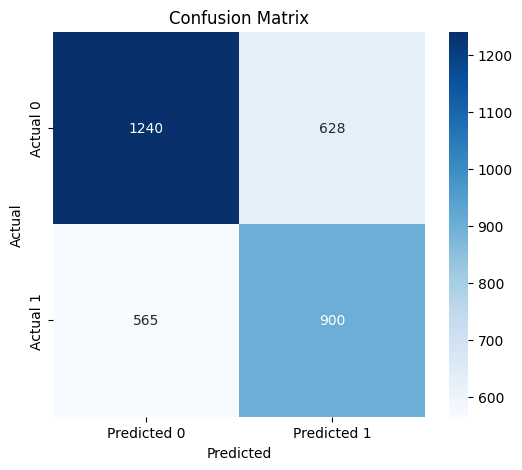

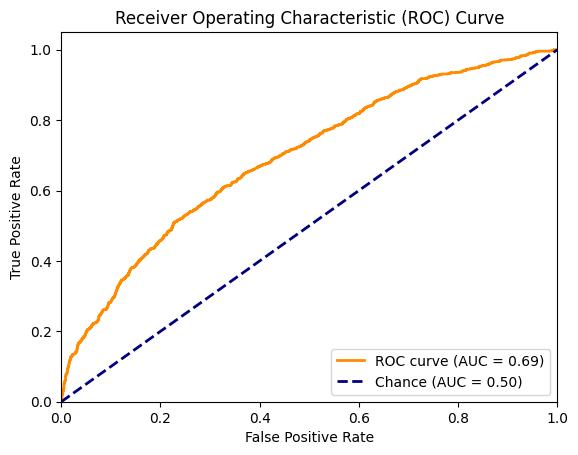


--- Assessing Model Calibration ---


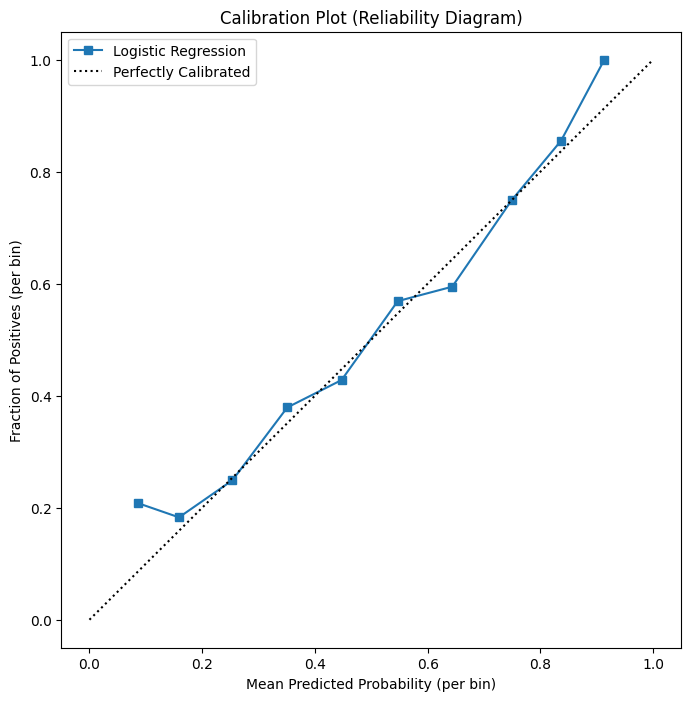

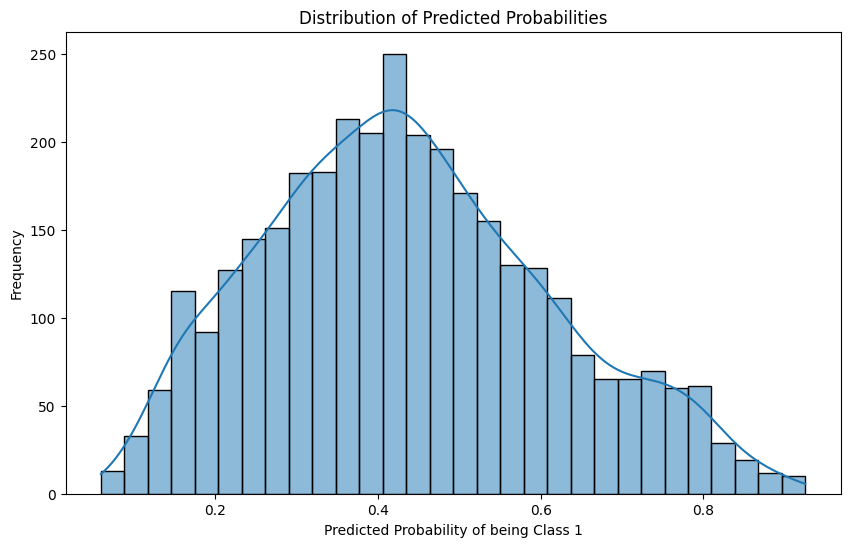

In [17]:
evaluate_model(test['home_win'],pred_test_proba)